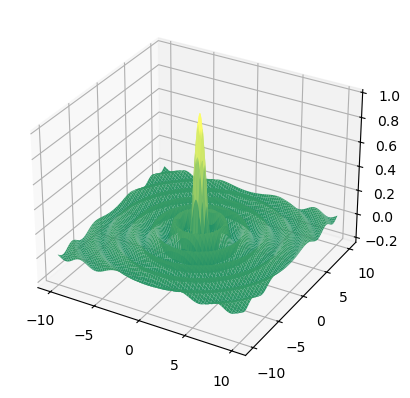

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

x,y = np.linspace(-10,10,400), np.linspace(-10,10,400)
X,Y = np.meshgrid(x,y)

f = np.sinc(np.hypot(X,Y))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,f, rstride=5, cstride=5,cmap=cm.summer)
plt.show()

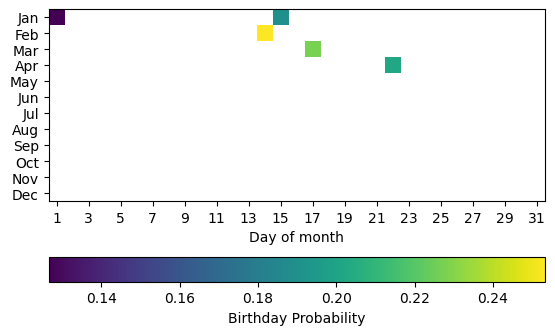

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных
data = [
    (1, 1, 100),
    (1, 15, 150),
    (2, 14, 200),
    (3, 17, 180),
    (4, 22, 160),
]

data_array = np.array(data, dtype=[('month', np.int32), ('day', np.int32), ('n', np.float64)])

total = np.sum(data_array['n'])
heatmap = np.empty((12, 31))
heatmap[:] = np.nan

mdpm = np.array([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
for month, day, n in data_array:
    imonth, iday = month - 1, day - 1
    if day > mdpm[imonth]:
        continue
    heatmap[imonth, iday] = n / total
heatmap[1, 28] *= 4

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')
ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
days = np.array(range(0, 31, 2))
ax.set_xticks(days)
ax.set_xticklabels(['{:d}'.format(day + 1) for day in days])
ax.set_xlabel('Day of month')

cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Birthday Probability')

plt.show()